In [1]:
import pandas as pd
k=pd.read_excel("fake_news_dataset.xlsx")

In [2]:
k.head(10)

Actual_Post Posted_date  Posted_page  \
0  መንግስት ከህዝቡ ጋር እልህ ውስጥ ከሚገባ ለተጠየቀው ህጋዊ ጥያቄ ተገቢ ...  2020-08-10  ፌደራሊስት ሀይሎች   
1  በአመራ ሙሁራን እና በትግራይ ሙሁራን ብዙ የሚያከራክር ነጠብ መሃሪ ዮሐን...  2020-08-10  ፌደራሊስት ሀይሎች   
2  “የአብይ አህመድ የልቦናው መዋቅር ጤናማ ባልሆነ ደረጃ ላይ ያለ ነው፤ ከ...  2020-08-10  ፌደራሊስት ሀይሎች   
3  አሀዳዊው ጦር መብታቸው የጠየቁትን 10 የወላይታ ተወላጆችን መግደሉ አለም...  2020-08-10  ፌደራሊስት ሀይሎች   
4  ፍትህ ለወላይታ  ፍትህ ለቅማንት ፍትህ ለኦሮሞ  ፍትህ ለሶማሌ  ፍትህ ለ...  2020-08-10  ፌደራሊስት ሀይሎች   
5  ፍትህ ያጣው ብሄር ! የአማራ ልዩ ሀይል በቅማንት ብሄረሰብ ላይ የሚፈፅመ...  2020-08-10  ፌደራሊስት ሀይሎች   
6  "በቃ አመፀኞችንና አሸባርዎችን አስረናል ከዛሬ ጀምሮ የተረጋጋችና ሰላማዊ...  2020-08-10  ፌደራሊስት ሀይሎች   
7  እግዚአብሔር ይፈርዳል::ክርስቲያንና ኦቶና ሆስፒታል ዞሬ ሳይ የንፁሃን ወ...  2020-08-10  ፌደራሊስት ሀይሎች   
8  "በትግራይ አዲሱ ታሪካዊው መንግስት ለመሰየም የምርጫ ቅስቀሳም ነገ ይጀመ...  2020-08-10  ፌደራሊስት ሀይሎች   
9  “በሀገር ላይ የሚቃጡ ጥቃቶችን ለመከላከል የተሟላ ዝግጅት ተደርጓል” - ...  2020-08-10  ፌደራሊስት ሀይሎች   

   No_of_like  No_of_follower Page_created_on is_verified label  
0       65084           65084      2019-02-02          No  Fake  
1       65084           65084      2019-02-02          No  Fake  
2       65084           65084      2019-02-02          No  Fake  
3       65084           65084      2019-02-02          No  Fake  
4       65084           65084      2019-02-02          No  Fake  
5       65084           65084      2019-02-02          No  Fake  
6       65084           65084      2019-02-02          No  Fake  
7       65084           65084      2019-02-02          No  Fake  
8       65084           65084      2019-02-02          No  Fake  
9       65084           65084      2019-02-02          No  Fake

In [3]:
import nltk
import re
import numpy as np

In [4]:
space_pattern = '\s+'
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
englishword_num ='[a-zA-Z]|[0-9]+'
AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
special_char = "[፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|]"
geez_number='[፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻] ' # for removing geez number
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                 u"\U0001F1E0-\U0001F1FF"  # flags 
                                 u"\U00002702-\U000027B0"
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
haa='[ሃ]'; he='[ሐ]'; hu='[ሑ]'; hi='[ሒ]'; ha='[ሓ]'; hie='[ሔ]'; h='[ሕ]'; ho='[ሖ]'; he1='[ኀ]'; hu1='[ኁ]'; hi1='[ኂ]'; ha1='[ኃ]'; hie1='[ኄ]'; h1='[ኅ]'; ho1='[ኆ]';
se='[ሠ]'; su='[ሡ]'; si='[ሢ]'; sa='[ሣ]'; sie='[ሤ]'; s='[ሥ]'; so='[ሦ]'; 
aa1='[ኣ]'; ae='[ዐ]'; au='[ዑ]'; ai='[ዒ]'; aa='[ዓ]'; aie='[ዔ]'; e='[ዕ]'; ao='[ዖ]';
tse='[ጸ]'; tsu='[ጹ]'; tsi='[ጺ]'; tsa='[ጻ]'; tsie='[ጼ]'; ts='[ጽ]'; tso='[ጾ]';

In [5]:
corpus=[]
for i in range(0,len(k)):
    Clean_text = re.sub(url_regex,'', str(k['Actual_Post'][i]))
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removingelongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = emoji_pattern.sub(r'', Clean_text)
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    ##################################################
    Clean_text= re.sub(he,'ሀ',Clean_text); 
    Clean_text= re.sub(hu,'ሁ',Clean_text);
    Clean_text= re.sub(hi,'ሂ',Clean_text);
    Clean_text= re.sub(ha,'ሀ',Clean_text); 
    Clean_text= re.sub(hie,'ሄ',Clean_text);
    Clean_text= re.sub(h,'ህ',Clean_text);
    Clean_text= re.sub(ho,'ሆ',Clean_text);
    Clean_text= re.sub(haa,'ሀ',Clean_text);
    #######################################################
    Clean_text= re.sub(he1,'ሀ',Clean_text) 
    Clean_text= re.sub(hu1,'ሁ',Clean_text) 
    Clean_text= re.sub(hi1,'ሂ',Clean_text)
    Clean_text= re.sub(ha1,'ሀ',Clean_text)
    Clean_text= re.sub(hie1,'ሄ',Clean_text)
    Clean_text= re.sub(h1,'ህ',Clean_text)
    Clean_text= re.sub(ho1,'ሆ',Clean_text)
    ##########################################################
    Clean_text= re.sub(se,'ሰ',Clean_text) 
    Clean_text= re.sub(su,'ሱ',Clean_text)
    Clean_text= re.sub(si,'ሲ',Clean_text)
    Clean_text= re.sub(sa,'ሳ',Clean_text)
    Clean_text= re.sub(sie,'ሴ',Clean_text) 
    Clean_text= re.sub(s,'ስ', Clean_text)
    Clean_text= re.sub(so,'ሶ',Clean_text)
    ###################################################
    Clean_text= re.sub(ae,'አ',Clean_text) 
    Clean_text= re.sub(au,'ኡ',Clean_text)
    Clean_text= re.sub(ai,'ኢ',Clean_text)
    Clean_text= re.sub(aa,'አ',Clean_text) 
    Clean_text= re.sub(aie,'ኤ',Clean_text)
    Clean_text= re.sub(e,'እ',Clean_text)
    Clean_text= re.sub(ao,'ኦ',Clean_text)
    Clean_text= re.sub(aa1,'አ',Clean_text)
    #############################################
    Clean_text= re.sub(tse,'ፀ',Clean_text) 
    Clean_text= re.sub(tsu,'ፁ',Clean_text) 
    Clean_text= re.sub(tsi,'ፂ',Clean_text)
    Clean_text= re.sub(tsa,'ፃ',Clean_text) 
    Clean_text= re.sub(tsie,'ፄ',Clean_text)
    Clean_text= re.sub(ts,'ፅ',Clean_text)
    Clean_text= re.sub(tso,'ፆ',Clean_text)
    Clean_text= Clean_text.split()
    Clean_text = ' '.join(Clean_text)
    corpus.append(Clean_text)

In [6]:
corpus

['መንግስት ከህዝቡ ጋር እልህ ውስጥ ከሚገባ ለተጠየቀው ህጋዊ ጥያቄ ተገቢ ምላሽ መስጠት አለበት ከዎላይታ ሶዶ ዩኒቨርሲቲ ም ፕረዚዳንት',
 'በአመራ ሙሁራን እና በትግራይ ሙሁራን ብዙ የሚያከራክር ነጠብ መሀሪ ዮሀንስ ተናገረ የመለስ ዜናዊ አላማ የሚኒሊክ ስርአተ የሽዋ ስርአት ማስቀጠል ነብር እንደ አብይ ባይሆንም እውነት መለስ የሚኒሊክ ስርአት ናፋቂ ነበር ነፍጠኛ ለምን መለስ እንደ ጠላት ያወግዘዋል አንድ እውነት ግን አለ በመለስ ግዜ ኢትዮጵያ ታላቅ ነበረች',
 'የአብይ አህመድ የልቦናው መዋቅር ጤናማ ባልሆነ ደረጃ ላይ ያለ ነው ከህዝብ የሚቀበላት ዝና ከሌለች የሚሞት ነው የሚሆነው የቀድሞ የኢንሳ ምክትል ሀላፊ ኮ ል ቢንያም ተወልደ ከአውሎ ሚድያ ጋር ባደረጉት ቆይታ የተናገሩት፦ እኔ ላይ ያጋጠመው እስር እንድማር ምናምን ሳይሆን አላማው ሌላ ነው የነበረው አላማው የማስፈራራት ራስህን እንድታጣ ሄደህ ሄደህም ባሪያ እንድሆን የመፈለግ ሁኔታ ነው የነበረው በ አብይ ከባድ ፈተና ነው የፈጠረብኝ ከኢንሳም ለመልቀቅ ብዙ ሀሳብ ነበረኝ ወቅት ነበር እሱ ግን ወደ እድል ተጠቀምኩበት ሳልወጣ ከኢንሳ በ ወደ አባልነት ለመግባት ጥረት ተደርጎ ነበር እሱ ገምግመንም የቀረበት ሁኔታ ነው የነበረው እንደ አቅም ሆኖ ያገለገለው ለአብይ እዚህም እንዲደርስ ያደረገው አሁንም የተወሰኑ ነገሮች እንዲሰራ ያደረገው ድፍረት አለው ከጤነኛ ያልሆነ የልቦና መዋቅር የሚመጣ ካለማወቅ የሚመጣ ካለመመራመር ካለመጠየቅ የሚመጣ ድፍረት በጣም ነበረው አሁንም ያገኘሁት እሱ ነው ዝና ለማግኘት የምትሞክረው በማታለል በመሸወድ ነው በማሽበርበር ነው ራስህንም ትሸውዳለህ ሌላ ሰውም ትሸውዳለህና ስለዚህ የአብይ የልቦናው መዋቅር ስታየው ጤናማ ወዳልሆነ ነገር ደረጃ ያለ ነው ጤናማ ባልሆነ መንገድ ጤናማ 

In [7]:
tokens=[]


from nltk.tokenize import word_tokenize


tokenized_sents = [word_tokenize(i) for i in corpus]
for i in tokenized_sents:
    #print(i)
    tokens.append(i)
    
tokens=[[word for word in article if len(word)>1]for article in tokens]

In [8]:
tokens

[['መንግስት',
  'ከህዝቡ',
  'ጋር',
  'እልህ',
  'ውስጥ',
  'ከሚገባ',
  'ለተጠየቀው',
  'ህጋዊ',
  'ጥያቄ',
  'ተገቢ',
  'ምላሽ',
  'መስጠት',
  'አለበት',
  'ከዎላይታ',
  'ሶዶ',
  'ዩኒቨርሲቲ',
  'ፕረዚዳንት'],
 ['በአመራ',
  'ሙሁራን',
  'እና',
  'በትግራይ',
  'ሙሁራን',
  'ብዙ',
  'የሚያከራክር',
  'ነጠብ',
  'መሀሪ',
  'ዮሀንስ',
  'ተናገረ',
  'የመለስ',
  'ዜናዊ',
  'አላማ',
  'የሚኒሊክ',
  'ስርአተ',
  'የሽዋ',
  'ስርአት',
  'ማስቀጠል',
  'ነብር',
  'እንደ',
  'አብይ',
  'ባይሆንም',
  'እውነት',
  'መለስ',
  'የሚኒሊክ',
  'ስርአት',
  'ናፋቂ',
  'ነበር',
  'ነፍጠኛ',
  'ለምን',
  'መለስ',
  'እንደ',
  'ጠላት',
  'ያወግዘዋል',
  'አንድ',
  'እውነት',
  'ግን',
  'አለ',
  'በመለስ',
  'ግዜ',
  'ኢትዮጵያ',
  'ታላቅ',
  'ነበረች'],
 ['የአብይ',
  'አህመድ',
  'የልቦናው',
  'መዋቅር',
  'ጤናማ',
  'ባልሆነ',
  'ደረጃ',
  'ላይ',
  'ያለ',
  'ነው',
  'ከህዝብ',
  'የሚቀበላት',
  'ዝና',
  'ከሌለች',
  'የሚሞት',
  'ነው',
  'የሚሆነው',
  'የቀድሞ',
  'የኢንሳ',
  'ምክትል',
  'ሀላፊ',
  'ቢንያም',
  'ተወልደ',
  'ከአውሎ',
  'ሚድያ',
  'ጋር',
  'ባደረጉት',
  'ቆይታ',
  'የተናገሩት፦',
  'እኔ',
  'ላይ',
  'ያጋጠመው',
  'እስር',
  'እንድማር',
  'ምናምን',
  'ሳይሆን',
  'አላማው',
  'ሌላ',
  'ነው',
  'የነበረው',
  'አላማው',
  'የማስፈራራት'

In [9]:
import re
stopword=[]
with open('stopworrrrd.txt','r' ,encoding='utf8') as f:
    f.readline()
    for i in f:
       
        stopword.append(re.sub('[\n]+', '',str(i)))

In [10]:
stopword

['ሁሉም',
 'ሆነው',
 'ሆኑ',
 'ላይ',
 'ሌላ',
 'ሌሎች',
 'ማንም',
 'ምናልባትም',
 'ሰአት',
 'ስለ ',
 'በላይ',
 'በተለይማ',
 'በታች',
 'በኩል',
 'በውስጥ',
 'በፊት',
 'በሇላ',
 'ብቻ',
 'ብዙ',
 'ተጨማሪ',
 'ታች',
 'ትናንት',
 'ነበረ',
 'ነበረች',
 'ነበሩ',
 'ነኝ',
 'ነው',
 'ነገር',
 'ነገሮች',
 'ናት',
 'ናቸው',
 'አለበት',
 'አለባችሁ',
 'አሉና',
 'አቶ',
 'አይደለም',
 'እስከ',
 'እርሱም',
 'እባኩህ',
 'እባኩዎ',
 'እና',
 'እኔ',
 'እንደ',
 'እንደገና',
 'እንዲሁም',
 'እንዲህ',
 'እንዲያውም',
 'እንጂ',
 'እኛ',
 'እያለ',
 'እያሉ',
 'እያንዳንዱ',
 'እያንዳንዳችው',
 'እያንዳንዷ',
 'ከላይ',
 'ከታች',
 'ከውስጥ',
 'ከዚያ',
 'ከፊት',
 'ወዘተ',
 'ወይም',
 'ወይንም',
 'ወይዘሪት',
 'ወይዘሮ',
 'ወደ',
 'ወደፊት',
 'ቢል',
 'ውስጥ',
 'ውጪ',
 'የታች',
 'የት',
 'የዚህ',
 'የዚያ',
 'ይህ',
 'ይላል',
 'ይባላል',
 'ደግሞ',
 'ድረስ',
 'ጋር',
 'ግን',
 'ጥቂት',
 'ፊት',
 'ባሉ',
 'ይሁን',
 'ብል',
 'ቢኖር',
 'ያለ',
 'ስለዚህም',
 'ያደርጋል',
 'ይሆናል',
 'አንተ',
 'ቢሆንም',
 'እንደዚህ',
 'በጣም',
 'በዚህም',
 'ሲል',
 'በምን',
 'እንዲሆን',
 'እነሆም',
 'ባይሆንም',
 'ሲሆን',
 'ሁለት',
 'እዚህ',
 'ባለፉት',
 'የውስጥ',
 'ስለ',
 'በርካታ',
 'አንዳንድ',
 'አንዳንዳችው',
 'ገና',
 'ማን',
 'ባክዎ',
 'ባክ',
 'ዉጪ',
 'ዉስጥ',
 'ኋላ',
 'መካከል',
 'ሰሞን',
 'ትናንትና',
 'ጋራ',
 '

In [11]:
after_stopword_remove=[]
after_stopword_remove=[[word for word in article if word not in stopword]for article in tokens]
after_stopword_remove

[['መንግስት',
  'ከህዝቡ',
  'እልህ',
  'ከሚገባ',
  'ለተጠየቀው',
  'ህጋዊ',
  'ጥያቄ',
  'ተገቢ',
  'ምላሽ',
  'መስጠት',
  'ከዎላይታ',
  'ሶዶ',
  'ዩኒቨርሲቲ',
  'ፕረዚዳንት'],
 ['በአመራ',
  'ሙሁራን',
  'በትግራይ',
  'ሙሁራን',
  'የሚያከራክር',
  'ነጠብ',
  'መሀሪ',
  'ዮሀንስ',
  'ተናገረ',
  'የመለስ',
  'ዜናዊ',
  'አላማ',
  'የሚኒሊክ',
  'ስርአተ',
  'የሽዋ',
  'ስርአት',
  'ማስቀጠል',
  'ነብር',
  'አብይ',
  'እውነት',
  'መለስ',
  'የሚኒሊክ',
  'ስርአት',
  'ናፋቂ',
  'ነበር',
  'ነፍጠኛ',
  'ለምን',
  'መለስ',
  'ጠላት',
  'ያወግዘዋል',
  'አንድ',
  'እውነት',
  'በመለስ',
  'ግዜ',
  'ኢትዮጵያ',
  'ታላቅ'],
 ['የአብይ',
  'አህመድ',
  'የልቦናው',
  'መዋቅር',
  'ጤናማ',
  'ባልሆነ',
  'ደረጃ',
  'ከህዝብ',
  'የሚቀበላት',
  'ዝና',
  'ከሌለች',
  'የሚሞት',
  'የቀድሞ',
  'የኢንሳ',
  'ምክትል',
  'ሀላፊ',
  'ቢንያም',
  'ተወልደ',
  'ከአውሎ',
  'ሚድያ',
  'ባደረጉት',
  'ቆይታ',
  'የተናገሩት፦',
  'ያጋጠመው',
  'እስር',
  'እንድማር',
  'ምናምን',
  'ሳይሆን',
  'አላማው',
  'የነበረው',
  'አላማው',
  'የማስፈራራት',
  'ራስህን',
  'እንድታጣ',
  'ሄደህ',
  'ሄደህም',
  'ባሪያ',
  'የመፈለግ',
  'የነበረው',
  'አብይ',
  'ከባድ',
  'ፈተና',
  'የፈጠረብኝ',
  'ከኢንሳም',
  'ለመልቀቅ',
  'ሀሳብ',
  'ነበረኝ',
  'ነበር',
  'እድል',
  'ተጠቀምኩበት

In [ ]:
kk=0
for j in after_stopword_remove:
    with open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(kk)+'.txt','w', encoding='utf8') as f:
        for listitem in j:
            f.write('%s\n' % listitem)
    kk+=1

In [ ]:
import string,l3
#stopwordsl=mymodule.importing_files_for_stopwords()
for i in range(0,4589):
    document='C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt'
    l3.anal_file('am', document,'C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv', root=False, gram=False,nbest=1)





#   እንዲሁም  
for i in range(0,4589):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    unstemmed_wordmtostrng="".join(unstemmed_wordmarray)
    unstemmed_wordm_final=unstemmed_wordmtostrng.split()
    unstemmed_wordm_final2=[]
    for ss in unstemmed_wordm_final:
        table = str.maketrans('', '', string.punctuation)
        ss = [w.translate(table) for w in ss]
        ss="".join(ss)
        unstemmed_wordm_final2.append(ss)

    df=pd.read_csv('C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv',sep=";",names=['word:'])
    final_stemmed_val=[]
    for k in range(0,len(df)):
        x=df.iloc[k,0]  
        final_stemmed_val.append(x)
    
    words_to_stemm=[]
    for xx in unstemmed_wordm_final2:
        adding_word_suffix='word: '+xx
        words_to_stemm.append(adding_word_suffix)
    ff=[]
    for yy in range(0,len(final_stemmed_val)):
        if final_stemmed_val[yy] not in words_to_stemm:
            ff.append(final_stemmed_val[yy])
    
    jj=[]
    for mm in range(0,len(ff)):
        table = str.maketrans('', '', string.punctuation)
        term_to_stem = [w.translate(table) for w in ff[mm]]
        term_to_stem="".join(term_to_stem)
       # term_to_stem= term_to_stem.split()
        if term_to_stem=="":
            continue
        elif len(term_to_stem)<2:
            continue
        else:
            jj.append(term_to_stem)
    mmm=" ".join(jj)
    mid_file = open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt', "w",encoding="utf8")
    mid_file.write((mmm))
    mid_file.close()

In [12]:
stemed_file=[]

for i in range(0,4590):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    stemed_file.append(unstemmed_wordmarray)
    

In [13]:
stemed_file

['   መንግስት    ህዝብ      አለ      ገባ      ተጠየቀ  ህጋዊ    ጥያቄ    ተገባ    ምላሽ    ሰጠ    ዎላይታ  ሶዶ  ዩኒቨርሲቲ  ፕረዚዳንት',
 '   አመራ    ሙሁራ    ትግራይ    ሙሁራ      አከራከረ  ነጠብ    መሀሪ    ዮሀንስ      ተናገረ    መለስ  ዜናዊ    አላማ    ሚኒሊክ  ስርአተ    የሽ    ስርአት    አስቀጠለ    ነብር      አበየ    እውነት    መለ    ሚኒሊክ    ስርአት    ናፈቀ    ነፍጠኛ    ምን    መለ    ጠላት      አወገዘ    እውነት    መለስ    ግዝ    ኢትዮጵያ    ታላቅ',
 '   አብይ  አህመድ    ልቦና    መዋቅር    ጤናማ      ሆነ    ደረጃ    ህዝብ      ተቀበለ    ዝና      አለ      ሞተ    ቀድሞ    ኢንሳ    ምክትል    ሀላፊ    ቢንያ  ተወልደ    አውሎ  ሚድያ      አደረገ      ቆየ  የተናገሩት      ተናገረ  ፦      አጋጠመ    እስር      ተማረ    ምናም      ሆነ    አላማ      ነበረ    አላማ    አስፈራራ    ራስ      አጣ      ሄደ      ሄደ    ባሪያ    ፈለገ      ነበረ      አበየ    ከባድ    ፈተና      ፈጠረ    ኢንሳም    ለቀቀ    ሀሳብ      ነበረ    እድል      ተጠቀመ      ወጣ    ኢንሳ    አባልነት    ገባ    ጥረት      ተደረገ      ገመገመ      ቀረ      ነበረ    አቅም      አገለገለ    አብይ    ይህ      ደረሰ      አደረገ    አሁን      ተወሰነ      ሰራ      አደረገ    ድፍረት    ጤነኛ      ሆነ    ልቦና    መዋቅር      መጣ    አወቀ      መጣ    ተመራመረ    ጠየቀ      መጣ    

In [14]:
stem=[]


from nltk.tokenize import word_tokenize


stemed_sents = [word_tokenize(j) for j in stemed_file]
for j in stemed_sents:
    #print(i)
    stem.append(j)
    
stem=[[word for word in article if len(word)>2]for article in stem]


In [15]:
stem

[['መንግስት',
  'ህዝብ',
  'ተጠየቀ',
  'ህጋዊ',
  'ጥያቄ',
  'ተገባ',
  'ምላሽ',
  'ዎላይታ',
  'ዩኒቨርሲቲ',
  'ፕረዚዳንት'],
 ['አመራ',
  'ሙሁራ',
  'ትግራይ',
  'ሙሁራ',
  'አከራከረ',
  'ነጠብ',
  'መሀሪ',
  'ዮሀንስ',
  'ተናገረ',
  'መለስ',
  'ዜናዊ',
  'አላማ',
  'ሚኒሊክ',
  'ስርአተ',
  'ስርአት',
  'አስቀጠለ',
  'ነብር',
  'አበየ',
  'እውነት',
  'ሚኒሊክ',
  'ስርአት',
  'ናፈቀ',
  'ነፍጠኛ',
  'ጠላት',
  'አወገዘ',
  'እውነት',
  'መለስ',
  'ኢትዮጵያ',
  'ታላቅ'],
 ['አብይ',
  'አህመድ',
  'ልቦና',
  'መዋቅር',
  'ጤናማ',
  'ደረጃ',
  'ህዝብ',
  'ተቀበለ',
  'ቀድሞ',
  'ኢንሳ',
  'ምክትል',
  'ሀላፊ',
  'ቢንያ',
  'ተወልደ',
  'አውሎ',
  'ሚድያ',
  'አደረገ',
  'የተናገሩት',
  'ተናገረ',
  'አጋጠመ',
  'እስር',
  'ተማረ',
  'ምናም',
  'አላማ',
  'ነበረ',
  'አላማ',
  'አስፈራራ',
  'ባሪያ',
  'ፈለገ',
  'ነበረ',
  'አበየ',
  'ከባድ',
  'ፈተና',
  'ፈጠረ',
  'ኢንሳም',
  'ለቀቀ',
  'ሀሳብ',
  'ነበረ',
  'እድል',
  'ተጠቀመ',
  'ኢንሳ',
  'አባልነት',
  'ጥረት',
  'ተደረገ',
  'ገመገመ',
  'ነበረ',
  'አቅም',
  'አገለገለ',
  'አብይ',
  'ደረሰ',
  'አደረገ',
  'አሁን',
  'ተወሰነ',
  'አደረገ',
  'ድፍረት',
  'ጤነኛ',
  'ልቦና',
  'መዋቅር',
  'አወቀ',
  'ተመራመረ',
  'ጠየቀ',
  'ድፍረት',
  'ነበረ',
  'አሁን',
  'አገኘ',
  'አገ

In [16]:
feature_size=150
window_context=10
min_word_count=2
sample=1e-3

In [17]:
from gensim.models import word2vec  
from gensim.models.word2vec import Word2Vec
w2v_model=word2vec.Word2Vec(tokens,size=feature_size,window=window_context,min_count=min_word_count,sample=sample,iter=50)
similar_words={search_term:[item[0] for item in w2v_model.wv.most_similar([search_term],topn=5)]
              for search_term in['ፍትህ','ህዝብ']}

In [18]:
similar_words

{'ፍትህ': ['ከምናደርገው', 'እንድያገኝ', 'እንዲሰለፉ', 'ሰአረ', 'ገዛኢ'],
 'ህዝብ': ['ህዝብም', 'ህዝብና', 'ጠላት', 'ጭፍጨፋ', 'አይደራደርም']}

In [19]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector=np.zeros((num_features,),dtype="float64")
    nwords=0.
    
    for word in words:
        if word in vocabulary:
            nwords=nwords+1.
            feature_vector=np.add(feature_vector,model[word])
            
    if nwords:
        feature_vector=np.divide(feature_vector, nwords)
    
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary=set(model.wv.index2word)
    features=[average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
             for tokenized_sentence in corpus]
    return np.array(features)


x=averaged_word_vectorizer(corpus=tokens, model=w2v_model, num_features=feature_size )
df=pd.DataFrame(x)

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
df

0         1         2         3         4         5         6    \
0    -0.627989 -0.608654  0.321536 -0.120416 -1.040742 -1.061778 -0.590313   
1    -1.376184 -0.610092 -0.418937 -1.024233  0.026633 -0.014475 -0.670271   
2    -0.798897 -0.448973  0.127630 -0.527358  0.445723 -0.083544 -0.275862   
3     0.896916  0.332605 -0.660507 -0.305004 -0.119411 -0.696830  0.281431   
4     0.008101 -0.841959  0.271733 -0.076904 -0.058363 -1.300517 -1.187096   
5    -0.355869  0.122080  0.275965 -0.488983 -0.450964 -0.397940 -0.477902   
6     0.037483 -0.004989 -0.981631  0.130810  0.035677  0.479261 -0.121872   
7    -0.764180 -0.732600 -1.015633 -0.274914  0.763882 -0.142334  0.154290   
8    -0.182078 -0.769143 -0.837718  0.682763 -1.136964 -0.043977 -0.666491   
9    -0.680810 -0.213597  0.360583 -0.549792  0.408841 -0.251554 -0.455213   
10   -1.570389 -0.035567  0.247885 -1.525915  0.814735  0.984801 -0.429498   
11   -0.815779 -1.482599  0.365991 -0.440939  1.251442 -0.138449 -0.181589   
12   -1.340848 -0.794173 -0.062402 -0.440290  0.188360  0.365968 -0.762741   
13   -0.312031 -0.058438  0.033281 -0.424474 -0.151715 -0.034678 -0.590320   
14   -1.201480 -0.754151  0.124064  0.620733  0.281951 -0.208844 -0.220842   
15   -0.834482 -0.333703 -0.708052 -0.307203  0.202131 -0.177362 -0.253369   
16   -1.113069 -0.891037 -0.106916 -0.294768  0.107452 -0.187145 -0.743706   
17   -1.339080 -0.400659  0.768445 -0.483819 -0.064799  0.347501 -0.680323   
18   -1.527324 -0.008548 -0.975607 -0.729528  0.069203  0.140452 -0.095821   
19   -1.369751  0.358462  0.534829  0.003082  0.316552 -0.236474 -0.122768   
20   -0.087983  0.314861 -0.454545 -0.555853  0.519914  0.236352  0.540468   
21   -0.783138 -0.118886 -0.105743 -0.616465 -1.674052 -1.024434  1.028900   
22   -1.359729 -0.147105  0.089719 -0.667240  0.574212 -0.271680 -0.066061   
23   -0.888763 -0.167299 -0.565819 -0.946836 -0.272510  0.010469 -0.751013   
24   -0.951104 -0.698365 -1.556651 -0.942752  0.695823  0.202649 -0.765625   
25   -0.817788 -0.806890  0.236468 -0.821277  0.198146  0.286179 -1.152393   
26   -0.842602  0.005404  0.242871 -0.538010 -0.069332 -0.312603 -0.444694   
27   -0.182208 -0.118431 -0.990358 -1.106515 -0.981428 -0.458162  0.461317   
28   -1.466699  0.508093  0.056379 -1.238013  0.009769  0.244143 -0.441784   
29   -1.381587 -1.359243 -0.667344 -0.711346  0.420951  0.046676 -0.591758   
...        ...       ...       ...       ...       ...       ...       ...   
4560 -1.134655 -0.510296 -0.128700 -1.250715 -0.219587  0.479487 -0.644113   
4561 -1.485407 -0.531784  0.076462 -0.654168  0.493049  0.255051 -1.082088   
4562 -1.721041 -0.304456  0.222457  0.133997  0.025948 -0.787147  0.062058   
4563 -1.332029 -0.532720  0.210897 -0.190927  0.296815 -0.009457 -0.683077   
4564 -1.886605 -0.425071 -0.014039 -1.092630  0.068596  1.069791 -1.060841   
4565 -0.354047  0.249500  0.031601 -1.058401  0.126932 -0.284066 -0.066396   
4566 -1.025218 -0.678167 -0.366431 -0.559154  0.649252  0.356098 -0.588344   
4567 -0.209863 -0.055582 -0.522522 -1.144807  0.126830  0.613678 -1.164046   
4568 -0.191470 -0.147899  0.209489 -0.999147 -0.072820 -0.016054 -0.559297   
4569 -0.610128  0.017597  0.576585 -0.125976  0.064087 -0.148884 -0.564889   
4570 -0.669443 -0.401266  0.432598 -0.645068 -0.052231  0.276126 -1.196068   
4571 -1.630045 -0.413884  1.339741 -0.946500 -0.785243  0.207778 -1.232121   
4572 -0.293324  0.625384 -0.188530 -0.726631 -0.149893  0.080451  0.168679   
4573 -0.568657 -0.309457 -0.344119 -0.371787  0.315094  0.398757 -0.628572   
4574 -0.801691 -0.170158 -0.454291 -1.130236  0.602692  0.328208 -0.031795   
4575 -0.325507  0.098089 -0.325440 -0.602191  0.211386  0.336790 -0.498425   
4576 -0.744728  0.287747 -0.237395 -1.277448 -0.230294  0.277554 -0.816777   
4577 -0.005049  0.230627 -0.659606 -1.096413  0.069105  0.160900 -1.071914   
4578 -0.568140 -0.577353 -0.741445 -0.731024  0.039836 -0.267027 -0.816068   
4579  0.309523  0.459249 -0.02515

In [21]:
y=k['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools

In [24]:
print(X_train.shape,y_train.shape)

(3672, 150) (3672,)


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy of LogisticRegression  classifier on training set: 0.96
Accuracy of LogisticRegression classifier on test set: 0.92
accuracy:   0.925
Confusion matrix, without normalization


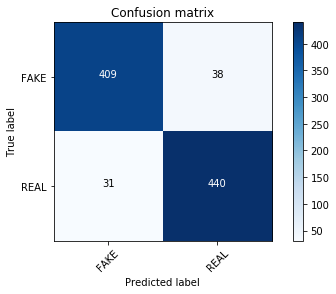

In [26]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.93      0.91      0.92       447
        Real       0.92      0.93      0.93       471

    accuracy                           0.92       918
   macro avg       0.93      0.92      0.92       918
weighted avg       0.92      0.92      0.92       918



In [28]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore1=cross_val_score(logreg,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(logreg,x,np.ravel(y),cv=5)

Accuracy of LogisticRegression with cv:0.9206971677559913
Confusion matrix, without normalization


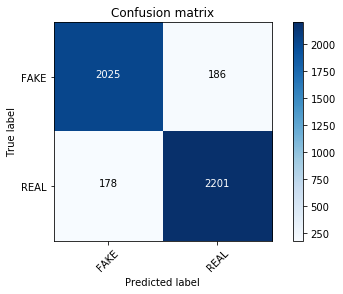

In [29]:
print('Accuracy of LogisticRegression with cv:'+str(cvscore1.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        Fake       0.92      0.92      0.92      2211
        Real       0.92      0.93      0.92      2379

    accuracy                           0.92      4590
   macro avg       0.92      0.92      0.92      4590
weighted avg       0.92      0.92      0.92      4590



Accuracy of support vector machine   classifier on training set: 0.96
Accuracy of support vector machine classifier on test set: 0.92
accuracy:   0.942
Confusion matrix, without normalization


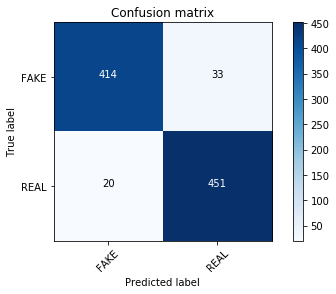

In [31]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
svmmodel_w2v=svmmodel_w2v.fit(X_train, y_train)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94       447
        Real       0.93      0.96      0.94       471

    accuracy                           0.94       918
   macro avg       0.94      0.94      0.94       918
weighted avg       0.94      0.94      0.94       918



In [33]:
cvscore2=cross_val_score(svmmodel_w2v,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(svmmodel_w2v,x,np.ravel(y),cv=5)

Accuracy of Support Vector machine with cv:0.9307189542483659
Confusion matrix, without normalization


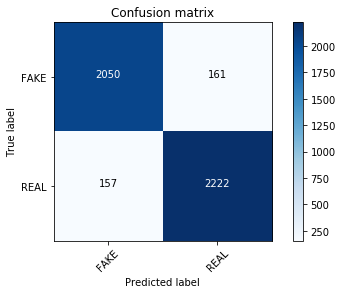

In [34]:
print('Accuracy of Support Vector machine with cv:'+str(cvscore2.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      2211
        Real       0.93      0.93      0.93      2379

    accuracy                           0.93      4590
   macro avg       0.93      0.93      0.93      4590
weighted avg       0.93      0.93      0.93      4590



In [ ]:
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.94
accuracy:   0.940
Confusion matrix, without normalization


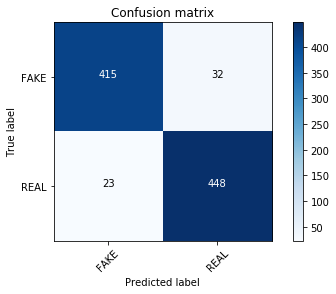

In [36]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_train, y_train)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94       447
        Real       0.93      0.95      0.94       471

    accuracy                           0.94       918
   macro avg       0.94      0.94      0.94       918
weighted avg       0.94      0.94      0.94       918



In [38]:
cvscore3=cross_val_score(Random,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(Random,x,np.ravel(y),cv=5)

Accuracy of RandomForest with cv:0.920479302832244
Confusion matrix, without normalization


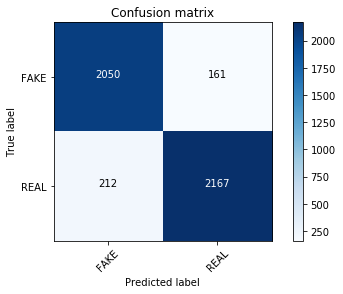

In [39]:
print('Accuracy of RandomForest with cv:'+str(cvscore3.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        Fake       0.91      0.93      0.92      2211
        Real       0.93      0.91      0.92      2379

    accuracy                           0.92      4590
   macro avg       0.92      0.92      0.92      4590
weighted avg       0.92      0.92      0.92      4590



In [ ]:
totacu=round((metrics.accuracy_score(y,y_pred)*100),3)
totacu

In [ ]:
totMisacu=round((1-metrics.accuracy_score(y,y_pred))*100,3)
totMisacu

In [ ]:
recall_Real=round((metrics.recall_score(y,y_pred,pos_label='Real'))*100,3)
recall_Real

In [ ]:
recall_Fake=round((metrics.recall_score(y,y_pred,pos_label='Fake'))*100,3)
recall_Fake

In [ ]:
precision_real=round((metrics.precision_score(y,y_pred,pos_label='Real'))*100,3);
precision_real

In [ ]:
precision_Fake=round((metrics.precision_score(y,y_pred,pos_label='Fake'))*100,3);
precision_Fake

In [ ]:
f1_score_Real=round(2*((recall_Real*precision_real)/(recall_Real+precision_real)),3)
f1_score_Real

In [ ]:
f1_score_Fake=round(2*((recall_Fake*precision_Fake)/(recall_Fake+precision_Fake)),3)
f1_score_Fake

In [ ]:
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])